SPAM EMAIL PREDICATION 


In [108]:
import numpy as np
import pandas as pd

In [109]:
df=pd.read_csv('/content/spam_ham_dataset.csv')
df. head() 

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [110]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [112]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [113]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

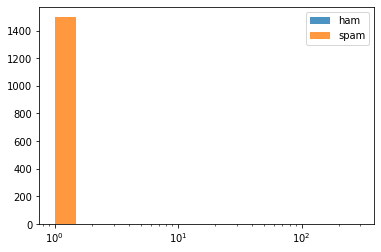

In [114]:
import matplotlib.pyplot as plt


plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['label_num'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['label_num'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

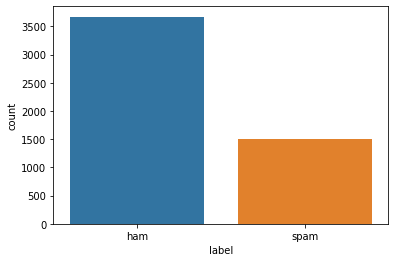

In [115]:
import seaborn as sns
sns.countplot(x="label", data=df)

In [116]:
X = df[['text','label_num']] 
y = df['label']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3464, 2)
Testing Data Shape:  (1707, 2)


In [118]:
X_train.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            label_num
Subject: calpi

In [119]:
y_train.value_counts()

ham     2426
spam    1038
Name: label, dtype: int64

In [120]:
y_test.value_counts()

ham     1246
spam     461
Name: label, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

X = df['text']  
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
y_train.value_counts()

ham     2426
spam    1038
Name: label, dtype: int64

In [123]:
y_test.value_counts()

ham     1246
spam     461
Name: label, dtype: int64

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3464, 40867)

In [125]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3464, 40867)

In [126]:
pd.DataFrame(X_train_tfidf)[0]

0         (0, 40508)\t0.06725429833475978\n  (0, 40498...
1         (0, 40498)\t0.043271543412021225\n  (0, 3992...
2         (0, 40778)\t0.0931152091462377\n  (0, 40498)...
3         (0, 39613)\t0.10519125751216014\n  (0, 39482...
4         (0, 39613)\t0.07572361287684203\n  (0, 38353...
                              ...                        
3459      (0, 40508)\t0.009284539014541463\n  (0, 4049...
3460      (0, 40498)\t0.05025820691232805\n  (0, 39725...
3461      (0, 40661)\t0.08018706376722393\n  (0, 40508...
3462      (0, 39354)\t0.16847612601659523\n  (0, 36442...
3463      (0, 40498)\t0.05257172124655783\n  (0, 40404...
Name: 0, Length: 3464, dtype: object

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3464, 40867)

In [128]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [129]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


text_clf.fit(X_train, y_train)  


predictions = text_clf.predict(X_test)

In [130]:
from sklearn import metrics
cm = (metrics.confusion_matrix(y_test,predictions))
print(aa)

[[1129   10]
 [   3  410]]


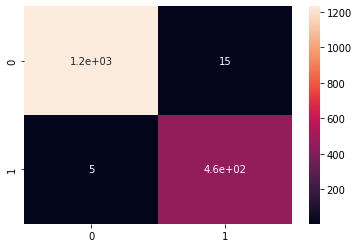

In [131]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

In [132]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1246
        spam       0.97      0.99      0.98       461

    accuracy                           0.99      1707
   macro avg       0.98      0.99      0.99      1707
weighted avg       0.99      0.99      0.99      1707



In [133]:
print(metrics.accuracy_score(y_test,predictions))

0.9882835383714118


In [134]:
text_clf.predict(['Congratulations , you won @ new stage '])[0]

'spam'